<a href="https://colab.research.google.com/github/Cloud2602/Risk-Estimation-from-Multi-Sensor-Motion-Data/blob/main/Risk_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Risk Estimation from Multi Sensor Motion Data

### Download Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# For v1.0 version of mini dataset
!wget https://man-truckscenes.s3.eu-central-1.amazonaws.com/release/mini/man-truckscenes_metadata_v1.0-mini.zip
!wget https://man-truckscenes.s3.eu-central-1.amazonaws.com/release/mini/man-truckscenes_sensordata_v1.0-mini.zip
!unzip "man-truckscenes_*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774953983.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716775005589.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716775052244.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716775103591.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716775154645.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716775202114.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716775253343.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716775351876.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716775403897.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716775455406.pcd  

In [3]:
%%bash
mkdir -p /content/data
cd "/content/drive/MyDrive"
unzip -o "man-truckscenes_*.zip" -d "/content"

Archive:  man-truckscenes_sensordata_v1.0-mini.zip
   creating: /content/man-truckscenes/
   creating: /content/man-truckscenes/samples/
   creating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473372666841.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473373166828.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473373666803.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473374166792.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473374667278.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473375166805.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473375666769.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BAC


2 archives were successfully processed.


Open github repository

In [ ]:
!git clone https://github.com/Cloud2602/Risk-Estimation-from-Multi-Sensor-Motion-Data.git

Cloning into 'Risk-Estimation-from-Multi-Sensor-Motion-Data'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
Receiving objects: 100% (12/12), done.
Resolving deltas: 100% (2/2), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)


## Initialization

In [3]:
!pip install truckscenes-devkit[all]

In [2]:
%matplotlib inline
from truckscenes import TruckScenes

trucksc = TruckScenes('v1.0-mini', 'man-truckscenes', True)

Loading truckscenes tables for version v1.0-mini...
11 attribute,
18 calibrated_sensor,
27 category,
20090 ego_motion_cabin,
20089 ego_motion_chassis,
20116 ego_pose,
1094 instance,
400 sample,
25750 sample_annotation,
43556 sample_data,
10 scene,
18 sensor,
4 visibility,
Done loading in 1.194 seconds.
Reverse indexing ...
Done reverse indexing in 0.3 seconds.


## BEV

In [ ]:
!mkdir /content/man-truckscenes/samples/BEV


In [ ]:
import json

file_path = "/content/man-truckscenes/v1.0-mini/sample_data.json"

try:
    with open(file_path, 'r') as f:
        data = json.load(f)
    print("✅ JSON caricato correttamente.")
except json.JSONDecodeError as e:
    print("❌ Errore nel parsing del file JSON:")
    print(f"  Messaggio: {e.msg}")
    print(f"  Riga: {e.lineno}, Colonna: {e.colno}")
    print(f"  Posizione: {e.pos}")

    # Stampa la riga problematica
    with open(file_path, 'r') as f:
        lines = f.readlines()
        if e.lineno <= len(lines):
            print("\n🔍 Riga con l'errore:")
            print(lines[e.lineno - 1].rstrip())
        else:
            print("⚠️ Impossibile accedere alla riga dell'errore: fuori intervallo.")
except FileNotFoundError:
    print("❌ File non trovato.")
except Exception as e:
    print(f"❌ Altro errore: {e}")


✅ JSON caricato correttamente.


In [ ]:
# Mostra i primi 5 sample_token validi
valid_samples = trucksc.sample
for i in range(5):
    print(f"[{i}] sample_token:", valid_samples[i]['token'])


[0] sample_token: 32d2bcf46e734dffb14fe2e0a823d059
[1] sample_token: deb7b3f332f042d49e7636d6e4959354
[2] sample_token: a574551be31547e4b7c78ff87c75abb3
[3] sample_token: 1393759bf6ff4f8e88deff0da0dc2aca
[4] sample_token: 368662645c194921b716c026347db664


In [5]:
record = trucksc.get('sample', "32d2bcf46e734dffb14fe2e0a823d059")
print(record)

{'token': '32d2bcf46e734dffb14fe2e0a823d059', 'scene_token': '044c648ac12345f1aedf33c9f91cdc5a', 'timestamp': 1695473372698161, 'prev': '', 'next': 'deb7b3f332f042d49e7636d6e4959354', 'data': {'RADAR_RIGHT_BACK': 'c790efd2151d491aae635234a5df26d8', 'RADAR_RIGHT_SIDE': '7f3083ba7f2e49678b4ccbc2fd14f590', 'RADAR_RIGHT_FRONT': '36c9a2c6b3ee4d9f9d01c902521cbb27', 'RADAR_LEFT_FRONT': '1e6375db490e4563b55fce389b06a53b', 'RADAR_LEFT_SIDE': 'c58e24c2e644404f85a5c0901d367338', 'RADAR_LEFT_BACK': 'e940e3abeab34da8833e013c84b52366', 'LIDAR_LEFT': '9ae8f9fd6cd2458298c82eb6a85119a6', 'LIDAR_RIGHT': '28a12ab75263458a977dd29ca4e54ee2', 'LIDAR_TOP_FRONT': '1ac1e8bcd1ed4493a73c011dc2441713', 'LIDAR_TOP_LEFT': '85c18e7eeb3c42f194eba257dcf6d66c', 'LIDAR_TOP_RIGHT': '064d8efa5f31493db10f96dbeef91282', 'LIDAR_REAR': '18b4fe677dc7408b84ebd555c559da16', 'CAMERA_LEFT_FRONT': '7625b794c8a14e918dc23113ee5d10da', 'CAMERA_LEFT_BACK': 'c6e32737071942fb9d5bcd8c69a88181', 'CAMERA_RIGHT_FRONT': '4e11f21f05be46f3b219a

### immagine di prova

<ipython-input-6-acae677eb106>:48: RuntimeWarning: overflow encountered in scalar add
  R_chan[xi, yi] += 1


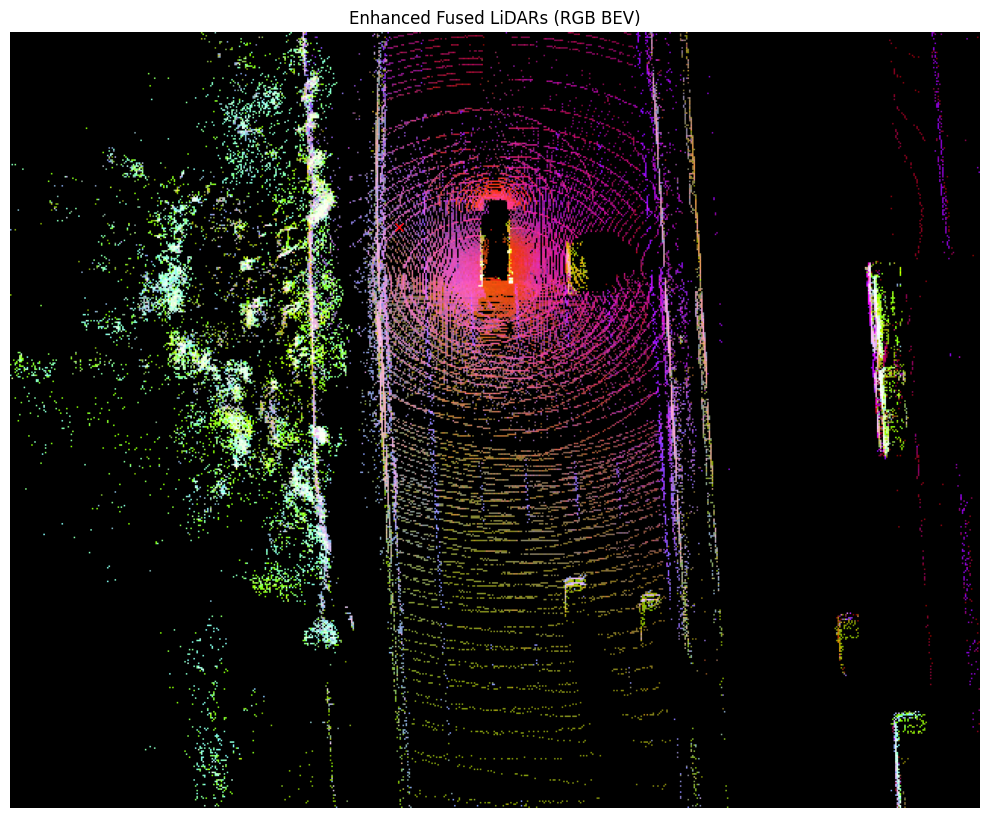

In [6]:
from scipy.spatial.transform import Rotation as R
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from truckscenes.utils.geometry_utils import transform_matrix
from pyquaternion import Quaternion
from truckscenes.utils.data_classes import LidarPointCloud


def bev_rgb_enhanced(points, intensities=None,
                     res=0.1,
                     side_range=(-40, 40), fwd_range=(-20, 60),
                     height_range=(-2, 2)):

    x, y, z = points[:, 0], points[:, 1], points[:, 2]
    if intensities is None:
        intensities = np.ones_like(x)

    # Applica il filtro per inquadrare l'area desiderata
    mask = (
        (x > fwd_range[0]) & (x < fwd_range[1]) &
        (y > side_range[0]) & (y < side_range[1])
    )
    x, y, z, intensities = x[mask], y[mask], z[mask], intensities[mask]

    # Converti in coordinate immagine
    x_img = ((x - fwd_range[0]) / res).astype(np.int32)
    y_img = ((y - side_range[0]) / res).astype(np.int32)
    H = int((fwd_range[1] - fwd_range[0]) / res)
    W = int((side_range[1] - side_range[0]) / res)

    # Mappa z e intensità su [0, 255]
    z_scaled = ((np.clip(z, *height_range) - height_range[0]) /
                (height_range[1] - height_range[0]) * 255).astype(np.uint8)
    intensities_scaled = ((intensities - np.min(intensities)) /
                          (np.ptp(intensities) + 1e-8) * 255).astype(np.uint8)

    # Crea 3 canali: R = densità, G = altezza, B = intensità
    R_chan = np.zeros((H, W), dtype=np.uint8)
    G_chan = np.zeros((H, W), dtype=np.uint8)
    B_chan = np.zeros((H, W), dtype=np.uint8)

    for xi, yi, zi, ii in zip(x_img, y_img, z_scaled, intensities_scaled):
        if 0 <= xi < H and 0 <= yi < W:
            G_chan[xi, yi] = max(G_chan[xi, yi], zi)
            B_chan[xi, yi] = max(B_chan[xi, yi], ii)
            R_chan[xi, yi] += 1

    # Normalizza canale R
    if R_chan.max() > 0:
        R_chan = np.clip((R_chan / R_chan.max()) * 255, 0, 255).astype(np.uint8)

    # Equalizzazione (facoltativa ma migliora il contrasto)
    R_eq = cv2.equalizeHist(R_chan)
    G_eq = cv2.equalizeHist(G_chan)
    B_eq = cv2.equalizeHist(B_chan)

    bev = np.stack([R_eq, G_eq, B_eq], axis=-1)
    bev = cv2.resize(bev, (640, 512), interpolation=cv2.INTER_NEAREST)

    return bev


def render_lidar_fused_enhanced(trucksc, sample_token: str, nsweeps: int = 1,
                                res=0.1, side_range=(-40, 40), fwd_range=(-20, 60),
                                height_range=(-3, 2),
                                figsize=(10, 10)):

    record = trucksc.get('sample', sample_token)

    # Trova tutti i token dei sensori lidar
    lidar_tokens = [
        token for channel, token in record['data'].items()
        if trucksc.get('sample_data', token)['sensor_modality'] == 'lidar'
    ]

    all_points = []

    for token in lidar_tokens:
        sd = trucksc.get('sample_data', token)
        sample = trucksc.get('sample', sd['sample_token'])
        chan = sd['channel']
        ref_chan = 'LIDAR_LEFT'
        ref_token = sample['data'][ref_chan]
        ref_sd = trucksc.get('sample_data', ref_token)

        pc, _ = LidarPointCloud.from_file_multisweep(trucksc, sample, chan, ref_chan, nsweeps=nsweeps)
        points = pc.points[:3, :]
        intensity = pc.points[3, :]

        # === Trasformazione in flat ego frame ===
        cs_record = trucksc.get('calibrated_sensor', ref_sd['calibrated_sensor_token'])
        pose_record = trucksc.get('ego_pose', ref_sd['ego_pose_token'])

        ref_to_ego = transform_matrix(cs_record['translation'], Quaternion(cs_record['rotation']))
        ego_yaw = Quaternion(pose_record['rotation']).yaw_pitch_roll[0]
        rotation_flat = np.dot(
            Quaternion(scalar=np.cos(ego_yaw / 2),
                       vector=[0, 0, np.sin(ego_yaw / 2)]).rotation_matrix,
            Quaternion(pose_record['rotation']).inverse.rotation_matrix
        )
        vehicle_flat = np.eye(4)
        vehicle_flat[:3, :3] = rotation_flat
        viewpoint = np.dot(vehicle_flat, ref_to_ego)

        points_h = np.vstack((points, np.ones(points.shape[1])))
        transformed = (viewpoint @ points_h).T[:, :3]

        all_points.append(np.hstack((transformed, intensity.reshape(-1, 1))))

    fused_points = np.vstack(all_points)

    # === Crea immagine BEV ===
    bev_img = bev_rgb_enhanced(fused_points[:, :3], fused_points[:, 3],
                               res=res,
                               side_range=side_range,
                               fwd_range=fwd_range,
                               height_range=height_range)

    # === Mostra immagine ===
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.imshow(bev_img)
    ax.axis('off')
    ax.set_title("Enhanced Fused LiDARs (RGB BEV)")

    # Centro veicolo (x=0, y=0)
    center_x = int((0 - fwd_range[0]) / res * 512 / ((fwd_range[1] - fwd_range[0]) / res))
    center_y = int((0 - side_range[0]) / res * 512 / ((side_range[1] - side_range[0]) / res))
    ax.plot(center_y, center_x, 'rx')

    plt.tight_layout()
    plt.show()


render_lidar_fused_enhanced(trucksc, "34d0b00f1801498c803ec07dce543b72")


## Immagini BEV

In [4]:
!rm -rf /content/DATASET/immagine

[1/400] Rendering sample: 32d2bcf46e734dffb14fe2e0a823d059
[2/400] Rendering sample: deb7b3f332f042d49e7636d6e4959354


KeyboardInterrupt: 

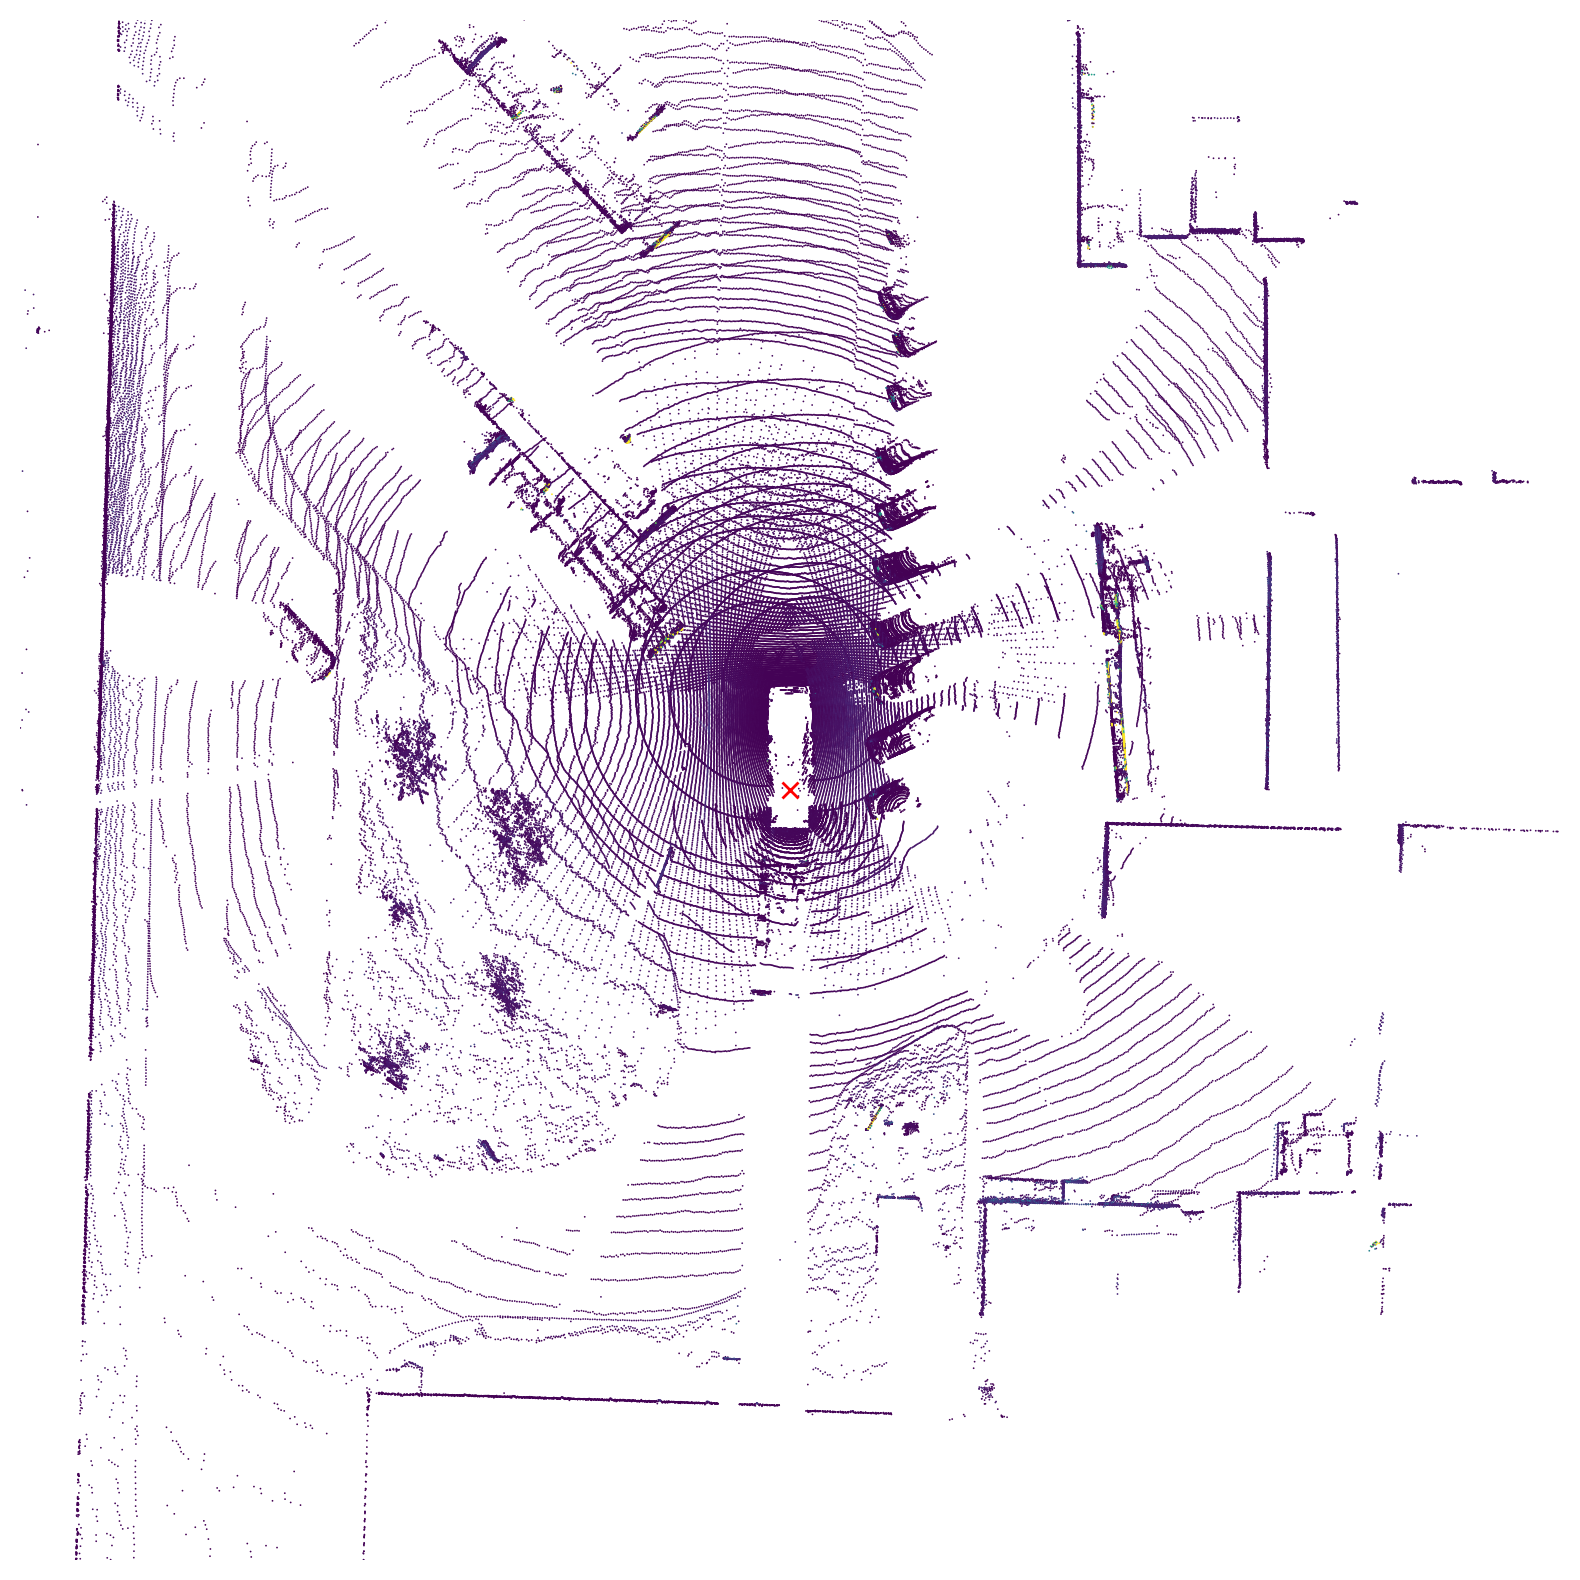

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable, get_cmap
from matplotlib.colors import Normalize, Colormap
from matplotlib import cm
from matplotlib.axes import Axes
from pyquaternion import Quaternion
from typing import List, Tuple, Union

# TruckScenes utils
from truckscenes.utils.geometry_utils import transform_matrix, view_points, BoxVisibility
from truckscenes.utils.data_classes import LidarPointCloud



def _render_pc_sample_data(trucksc,
                               sensor_modality: str,
                               sample_data_token: str,
                               with_anns: bool = True,
                               selected_anntokens: List[str] = None,
                               box_vis_level: BoxVisibility = BoxVisibility.ANY,
                               axes_limit: Union[List[float], Tuple[float], float] = 40,
                               ax: Axes = None,
                               nsweeps: int = 1,
                               use_flat_vehicle_coordinates: bool = True,
                               point_scale: float = 1.0,
                               cmap: str = 'viridis',
                               cnorm: bool = True) -> None:

        intensities = []
        points = []

        for sd_token in sample_data_token:
            sd_record = trucksc.get('sample_data', sd_token)

            sample_rec = trucksc.get('sample', sd_record['sample_token'])
            chan = sd_record['channel']
            ref_chan = 'LIDAR_LEFT'
            ref_sd_token = sample_rec['data'][ref_chan]
            ref_sd_record = trucksc.get('sample_data', ref_sd_token)

            if sensor_modality == 'lidar':
                # Get aggregated lidar point cloud in lidar frame.
                pc, _ = LidarPointCloud.from_file_multisweep(trucksc, sample_rec,
                                                             chan, ref_chan,
                                                             nsweeps=nsweeps)
                velocities = None
                intensity = pc.points[3, :]
            else:
                # Get aggregated radar point cloud in reference frame.
                # The point cloud is transformed to the reference frame
                # for visualization purposes.
                pc, _ = RadarPointCloud.from_file_multisweep(trucksc, sample_rec,
                                                             chan, ref_chan,
                                                             nsweeps=nsweeps)

                # Transform radar velocities (x is front, y is left),
                # as these are not transformed when loading the
                # point cloud.
                radar_cs_record = trucksc.get('calibrated_sensor',
                                                   sd_record['calibrated_sensor_token'])
                ref_cs_record = trucksc.get('calibrated_sensor',
                                                 ref_sd_record['calibrated_sensor_token'])
                velocities = pc.points[3:5, :]
                velocities = np.vstack((velocities, np.zeros(pc.points.shape[1])))
                velocities = np.dot(Quaternion(radar_cs_record['rotation']).rotation_matrix,
                                    velocities)
                velocities = np.dot(Quaternion(ref_cs_record['rotation']).rotation_matrix.T,
                                    velocities)
                velocities[2, :] = np.zeros(pc.points.shape[1])
                intensity = pc.points[6, :]

            # By default we render the sample_data top down in the sensor frame.
            # This is slightly inaccurate when rendering the map as the sensor frame may
            # not be perfectly upright.
            if use_flat_vehicle_coordinates:
                # Retrieve transformation matrices for reference point cloud.
                cs_record = trucksc.get('calibrated_sensor',
                                             ref_sd_record['calibrated_sensor_token'])
                pose_record = trucksc.get('ego_pose',
                                               ref_sd_record['ego_pose_token'])
                ref_to_ego = transform_matrix(translation=cs_record['translation'],
                                              rotation=Quaternion(cs_record["rotation"]))

                # Compute rotation between 3D vehicle pose and "flat" vehicle pose
                # (parallel to global z plane).
                ego_yaw = Quaternion(pose_record['rotation']).yaw_pitch_roll[0]
                rotation_vehicle_flat_from_vehicle = np.dot(
                    Quaternion(scalar=np.cos(ego_yaw / 2),
                               vector=[0, 0, np.sin(ego_yaw / 2)]).rotation_matrix,
                    Quaternion(pose_record['rotation']).inverse.rotation_matrix)
                vehicle_flat_from_vehicle = np.eye(4)
                vehicle_flat_from_vehicle[:3, :3] = rotation_vehicle_flat_from_vehicle
                viewpoint = np.dot(vehicle_flat_from_vehicle, ref_to_ego)

                # Rotate upwards
                vehicle_flat_up_from_vehicle_flat = np.eye(4)
                rotation_axis = Quaternion(matrix=viewpoint[:3, :3])
                vehicle_flat_up_from_vehicle_flat[:3, :3] = \
                    Quaternion(axis=rotation_axis.rotate([0, 0, 1]),
                               angle=np.pi/2).rotation_matrix
                viewpoint = np.dot(vehicle_flat_up_from_vehicle_flat, viewpoint)
            else:
                viewpoint = np.eye(4)

            # Show point cloud
            points.append(view_points(pc.points[:3, :], viewpoint, normalize=False))
            intensities.append(intensity)

        points = np.concatenate(points, axis=1)
        intensities = np.concatenate(intensities, axis=0)

        # Colormapping
        if cnorm:
            norm = Normalize(vmin=np.min(intensities), vmax=np.max(intensities), clip=True)
        else:
            norm = None
        mapper = ScalarMappable(norm=norm, cmap=cmap)
        colors = mapper.to_rgba(intensities)[..., :3]

        point_scale = point_scale * 0.4 if sensor_modality == 'lidar' else point_scale * 3.0
        ax.scatter(points[0, :], points[1, :], marker='o',
                   c=colors, s=point_scale, edgecolors='none')

        # Show ego vehicle
        ax.plot(0, 0, 'x', color='red')

        # Show boxes
        if with_anns:
            # Get boxes in lidar frame.box_vis_level
            _, boxes, _ = trucksc.get_sample_data(
                ref_sd_token, box_vis_level=box_vis_level, selected_anntokens=selected_anntokens,
                use_flat_vehicle_coordinates=use_flat_vehicle_coordinates
            )



            # Render boxes
            for box in boxes:
                c = np.array(trucksc.colormap[box.name]) / 255.0
                box.render(ax, view=np.eye(4), colors=(c, c, c), linewidth=2.0)
                print(box)
        # Limit visible range.
        ax.set_xlim(-axes_limit[0], axes_limit[0])
        ax.set_ylim(-axes_limit[1], axes_limit[1])


def render_sample_data(trucksc,
                           sample_data_token: str,
                           with_anns: bool = True,
                           selected_anntokens: List[str] = None,
                           box_vis_level: BoxVisibility = BoxVisibility.ANY,
                           axes_limit: Union[List[float], Tuple[float], float] = 40,
                           ax: Axes = None,
                           nsweeps: int = 1,
                           out_path: str = None,
                           use_flat_vehicle_coordinates: bool = True,
                           point_scale: float = 1.0,
                           cmap: str = 'viridis',
                           cnorm: bool = True) -> None:

        if not isinstance(sample_data_token, list):
            sample_data_token = [sample_data_token]

        if not isinstance(cmap, Colormap):
            cmap = plt.get_cmap(cmap)

        if not isinstance(axes_limit, (list, tuple)):
            axes_limit = [axes_limit, axes_limit]

        # Determine sensor modality
        sensor_modality = trucksc.get('sample_data', sample_data_token[0])['sensor_modality']

        # Render Point Cloud data
        if sensor_modality in ['lidar', 'radar']:
            # Init axes.
            if ax is None:
                _, ax = plt.subplots(1, 1, figsize=(9, 9))

            # Render point cloud data onto axis
            _render_pc_sample_data(trucksc, sensor_modality, sample_data_token, False,
                                        selected_anntokens, box_vis_level, axes_limit,
                                        ax, nsweeps, use_flat_vehicle_coordinates,
                                        point_scale, cmap, cnorm)



        ax.axis('off')
        ax.set_title('{} {labels_type}'.format(sensor_modality.upper(), labels_type=''))
        ax.set_aspect('equal')

        if out_path is not None:
            os.makedirs(os.path.dirname(out_path), exist_ok=True)
            plt.savefig(out_path, bbox_inches='tight', pad_inches=0, transparent=True, dpi=800)


def render_lidar_fused(trucksc,
                       sample_token: str,
                       box_vis_level: BoxVisibility = BoxVisibility.ANY,
                       nsweeps: int = 1,
                       out_path: str = None,
                       verbose: bool = True) -> None:

    record = trucksc.get('sample', sample_token)

    lidar_tokens = []
    for channel, token in record['data'].items():
        sd_record = trucksc.get('sample_data', token)
        if sd_record['sensor_modality'] == 'lidar':
            lidar_tokens.append(token)

    if len(lidar_tokens) == 0:
        print(f"Nessun LIDAR per {sample_token}")
        return

    # === Imposta figura quadrata fissa (es: 10x10 pollici a 200 dpi → 2000x2000 px)
    fig_size_inch = 10
    dpi = 200
    fig, ax = plt.subplots(1, 1, figsize=(fig_size_inch, fig_size_inch), dpi=dpi)

    # === Rendering combinato di tutti i lidar del sample
    render_sample_data(
        trucksc,
        sample_data_token=lidar_tokens,   # LISTA dei lidar da fondere
        with_anns=True,
        box_vis_level=box_vis_level,
        axes_limit=(40, 40),  # range XY coerente con annotazioni
        ax=ax,
        nsweeps=nsweeps,
        use_flat_vehicle_coordinates=True,
        point_scale=1.0,
        cmap='viridis',
        cnorm=True
    )

    # === Pulizia finale
    ax.set_title("")
    ax.axis("off")

    # === Salvataggio immagine BEV
    out_img_path = f"DATASET/immagine/{sample_token}.png"
    os.makedirs(os.path.dirname(out_img_path), exist_ok=True)

    plt.savefig(
        out_img_path,
        bbox_inches='tight',   # taglia solo bordi vuoti reali
        pad_inches=0,
        transparent=False
    )
    plt.close(fig)




# === Cartella in cui salvare le immagini ===
output_img_dir = "DATASET/immagine"
os.makedirs(output_img_dir, exist_ok=True)

# === Itera su tutti i sample token ===
sample_tokens = [s['token'] for s in trucksc.sample]  # lista completa dei sample_token

for i, sample_token in enumerate(sample_tokens):
    print(f"[{i+1}/{len(sample_tokens)}] Rendering sample: {sample_token}")
    try:
        render_lidar_fused(trucksc, sample_token=sample_token)
    except Exception as e:
        print(f"Errore nel rendering di {sample_token}: {e}")



#trucksc.render_sample(token)


In [13]:
# Specifica il sample_token
sample_token = "34d0b00f1801498c803ec07dce543b72"  # Inserisci il tuo sample_token

# Ottieni i dati del sample
sample = trucksc.get('sample', sample_token)
# Estrai le annotazioni associate al sample
annotation_tokens = sample['anns']


boxes = [trucksc.get_box(ann_token) for ann_token in annotation_tokens]
for box in boxes:
    print(f"box:  {box}")


box:  label: nan, score: nan, xyz: [699177.38, 5320413.07, 593.69], wlh: [1.88, 6.02, 2.01], rot axis: [0.00, 0.00, 1.00], ang(degrees): -63.24, ang(rad): -1.10, vel: nan, nan, nan, name: vehicle.car, token: c1a3722926444838b0aae3aad80b9d2e
box:  label: nan, score: nan, xyz: [699132.87, 5320561.10, 596.37], wlh: [1.95, 4.45, 1.79], rot axis: [-0.00, 0.00, 1.00], ang(degrees): 117.03, ang(rad): 2.04, vel: nan, nan, nan, name: vehicle.car, token: ff0acb2b04124e36a0e42a7df3b312ba
box:  label: nan, score: nan, xyz: [699135.94, 5320500.59, 595.66], wlh: [1.55, 4.54, 2.08], rot axis: [0.00, 0.00, 1.00], ang(degrees): -64.54, ang(rad): -1.13, vel: nan, nan, nan, name: vehicle.trailer, token: 5b132c99323443c7b1cb098affb29509
box:  label: nan, score: nan, xyz: [699223.98, 5320348.53, 594.04], wlh: [1.18, 0.31, 3.23], rot axis: [-0.00, -0.00, 1.00], ang(degrees): -59.56, ang(rad): -1.04, vel: nan, nan, nan, name: static_object.traffic_sign, token: 1276de0ac0f04e538fbfdb29de31d9ba
box:  label: na

In [ ]:

def view_points(points: np.ndarray, view: np.ndarray, normalize: bool) -> np.ndarray:
    """
    This is a helper class that maps 3d points to a 2d plane. It can be used to implement
    both perspective and orthographic projections. It first applies the dot product between
    the points and the view. By convention, the view should be such that the data is projected
    onto the first 2 axis. It then optionally applies a normalization along the third dimension.

    For a perspective projection the view should be a 3x3 camera matrix, and normalize=True
    For an orthographic projection with translation the view is a 3x4 matrix and normalize=False
    For an orthographic projection without translation the view is a 3x3 matrix
    (optionally 3x4 with last columns all zeros) and normalize=False

    :param points: <np.float32: 3, n> Matrix of points, where each point (x, y, z)
        is along each column.
    :param view: <np.float32: n, n>. Defines an arbitrary projection (n <= 4).
        The projection should be such that the corners are projected onto the first 2 axis.
    :param normalize: Whether to normalize the remaining coordinate (along the third axis).
    :return: <np.float32: 3, n>. Mapped point. If normalize=False,
        the third coordinate is the height.
    """
    assert view.shape[0] <= 4
    assert view.shape[1] <= 4
    assert points.shape[0] == 3

    viewpad = np.eye(4)
    viewpad[:view.shape[0], :view.shape[1]] = view

    nbr_points = points.shape[1]

    # Do operation in homogenous coordinates.
    points = np.concatenate((points, np.ones((1, nbr_points))))
    points = np.dot(viewpad, points)
    points = points[:3, :]

    if normalize:
        points = points / points[2:3, :].repeat(3, 0).reshape(3, nbr_points)

    return points



def get_box_corners(box):
  """Restituisce i vertici (8) del box 3D, shape (3, 8)"""
  return box.corners()  # ritorna shape (3, 8)

def box_to_yolo_from_view(box, view_matrix, img_width, img_height, class_map):
  # Proietta i vertici del box

  corners = get_box_corners(box)  # shape (3, 8)
  print(f"Corners:{corners}, shape {corners.shape}")
  proj = view_points(corners, view_matrix, normalize=False)  # shape (3, 8)

  # Prendi solo le coordinate X, Y (BEV)
  x_coords = proj[0, :]
  y_coords = proj[1, :]

  x_coords_img = ((x_coords +40)/80) *img_width
  y_coords_img = ((y_coords +40)/80)* img_height

  xmin = np.clip(np.min(x_coords_img), 0, img_width)
  xmax = np.clip(np.max(x_coords_img), 0, img_width)
  ymin = np.clip(np.min(y_coords_img), 0, img_height)
  ymax = np.clip(np.max(y_coords_img), 0, img_height)


  print(f"x coords range: {x_coords.min()} - {x_coords.max()}")
  print(f"y coords range: {y_coords.min()} - {y_coords.max()}")

  # YOLO format: cx, cy, w, h normalizzati
  x_center = (xmin + xmax) / 2 / img_width
  y_center = (ymin + ymax) / 2 / img_height
  width = (xmax - xmin) / img_width
  height = (ymax - ymin) / img_height

  class_id = class_map.get(box.name, -1)
  if class_id == -1:
      return None

  return f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}"


all_class_names = set()

# Itera su tutti i samples del dataset
for sample in trucksc.sample:  # trucksc.sample è la lista di tutti i sample
    sample_data = trucksc.get('sample', sample['token'])
    for ann_token in sample_data['anns']:
        box = trucksc.get_box(ann_token)
        all_class_names.add(box.name)

# Ordina le classi per consistenza
sorted_class_names = sorted(all_class_names)

# Crea la class_map YOLO
class_map = {name: idx for idx, name in enumerate(sorted_class_names)}

# (Opzionale) stampa la class_map
print("class_map =", class_map)


# Dimensione immagine BEV (devi adattarlo a ciò che usi)
img_width, img_height = 640,640

# Specifica il sample_token
sample_token = "34d0b00f1801498c803ec07dce543b72"  # Inserisci il tuo sample_token

# Ottieni i dati del sample
sample_data_dict = sample['data']
# Estrai le annotazioni associate al sample
annotation_tokens = sample['anns']
boxes = [trucksc.get_box(ann_token) for ann_token in annotation_tokens]

for sensor_name, sd_token in sample_data_dict.items():
  sd_record = trucksc.get('sample_data', sd_token)

  sample_rec = trucksc.get('sample', sd_record['sample_token'])
  ref_chan = 'LIDAR_LEFT'
  ref_sd_token = sample_rec['data'][ref_chan]
  ref_sd_record = trucksc.get('sample_data', ref_sd_token)
  # Retrieve transformation matrices for reference point cloud.
  cs_record = trucksc.get('calibrated_sensor',
                                ref_sd_record['calibrated_sensor_token'])
  pose_record = trucksc.get('ego_pose',
                                  ref_sd_record['ego_pose_token'])
  ref_to_ego = transform_matrix(translation=cs_record['translation'],
                                rotation=Quaternion(cs_record["rotation"]))

  # Compute rotation between 3D vehicle pose and "flat" vehicle pose
  # (parallel to global z plane).
  ego_yaw = Quaternion(pose_record['rotation']).yaw_pitch_roll[0]
  rotation_vehicle_flat_from_vehicle = np.dot(
      Quaternion(scalar=np.cos(ego_yaw / 2),
                  vector=[0, 0, np.sin(ego_yaw / 2)]).rotation_matrix,
      Quaternion(pose_record['rotation']).inverse.rotation_matrix)
  vehicle_flat_from_vehicle = np.eye(4)
  vehicle_flat_from_vehicle[:3, :3] = rotation_vehicle_flat_from_vehicle
  viewpoint = np.dot(vehicle_flat_from_vehicle, ref_to_ego)

# Rotate upwards
vehicle_flat_up_from_vehicle_flat = np.eye(4)
rotation_axis = Quaternion(matrix=viewpoint[:3, :3])
vehicle_flat_up_from_vehicle_flat[:3, :3] = \
    Quaternion(axis=rotation_axis.rotate([0, 0, 1]),
                angle=np.pi/2).rotation_matrix
viewpoint = np.dot(vehicle_flat_up_from_vehicle_flat, viewpoint)


print(f"Viewpoint:{viewpoint}")
# Genera annotazioni YOLO dal BEV
yolo_lines = []
for box in boxes:
    yolo_line = box_to_yolo_from_view(box, viewpoint, img_width, img_height, class_map)
    if yolo_line:
        yolo_lines.append(yolo_line)

# Scrivile su file .txt
with open(f"{sample_token}.txt", 'w') as f:
    for line in yolo_lines:
        f.write(line + "\n")
